# Exploratory Data Analysis on Mutual Funds

In [1]:
# Import all Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objects as go

In [2]:
mf = pd.read_csv('MF_Data_Clean.csv',parse_dates=['AMC Launch Date','Scheme Launch Date'])

In [3]:
fig = ex.bar(mf, x="AMC Name", y="Mutual Fund Name",hover_data='AUM',width=900, height=500)
fig.update_layout(
    title="No of Mutual Fund Scheme lauched by Asset Management Company",
    xaxis_title="Asset Management Companies",
    yaxis_title="Mutual Fund Scheme Names",
    yaxis_ticks=""
)
fig.update_yaxes(showticklabels=False)
fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'customdata': array([[ 5565.26402101],
                                   [31945.148     ],
                                   [  924.57470136],
                                   ...,
                                   [ 1115.6436    ],
                                   [    0.        ],
                                   [  600.0603    ]]),
              'hovertemplate': 'AMC Name=%{x}<br>Mutual Fund Name=%{y}<br>AUM=%{customdata[0]}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'uid': 'e7155b20-7cfe-4a10-a66f-bee8f683e19a',
              'x': array(['ESCORTS', 'RELIANCE', 'ESCORTS', ..., 'HDFC', 'ESCORTS', 'Baroda'],
                 

In [4]:
mf.groupby('AMC Name')['Mutual Fund Name'].count().sort_values(ascending=False).shape

(45,)

In [5]:
mf.groupby('AMC Name')['Mutual Fund Name'].count().sort_values(ascending=False)

AMC Name
ICICI_PRUDENTIAL                 77
BIRLA_SUN_LIFE                   64
SBI                              55
HDFC                             54
RELIANCE                         53
Tata                             46
Axis                             46
UTI                              45
HSBC                             45
DSP                              43
Sundaram                         42
IDFC                             42
KOTAK_MAHINDRA                   41
Edelweiss                        38
FRANKLIN_TEMPLETON               34
Invesco                          31
LIC                              30
MIRAE_ASSET                      29
DHFL_PRAMERICA                   23
MOTILAL_OSWAL                    23
IDBI                             21
CANARA_ROBECO                    21
Baroda                           20
ESCORTS                          19
UNION_KBC                        19
MAHINDRA                         17
BARODABNPPARIBASMUTUALFUND_MF    17
BOI_AXA            

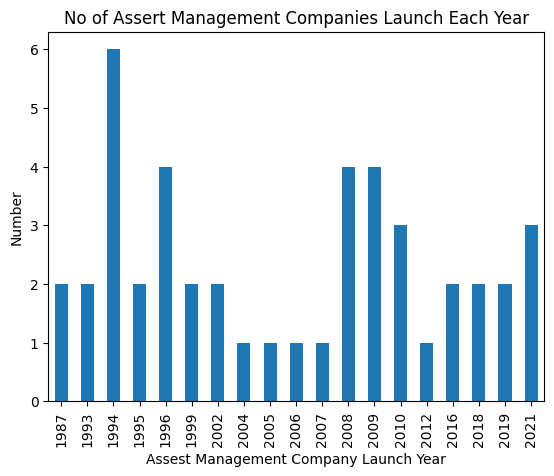

In [6]:
plt.title('No of Assert Management Companies Launch Each Year')
mf.groupby(pd.to_datetime(mf['AMC Launch Date']).dt.strftime('%Y').sort_values())['AMC Name'].nunique().plot(kind='bar')
plt.xlabel('Assest Management Company Launch Year')
plt.ylabel('Number')
plt.show()

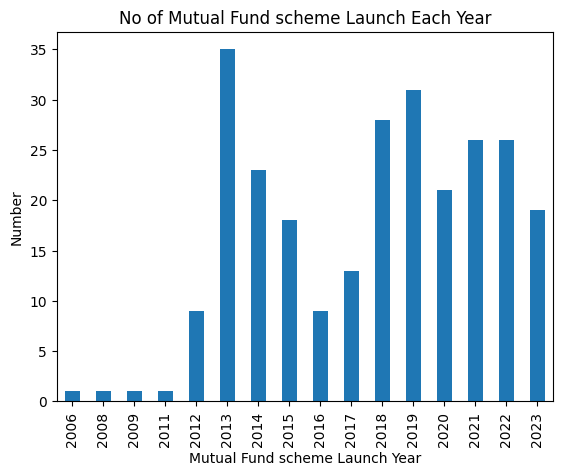

In [7]:
plt.title('No of Mutual Fund scheme Launch Each Year')
mf.groupby(pd.to_datetime(mf['Scheme Launch Date']).dt.strftime('%Y').sort_values())['AMC Name'].nunique().plot(kind='bar')
plt.xlabel('Mutual Fund scheme Launch Year')
plt.ylabel('Number')
plt.show()

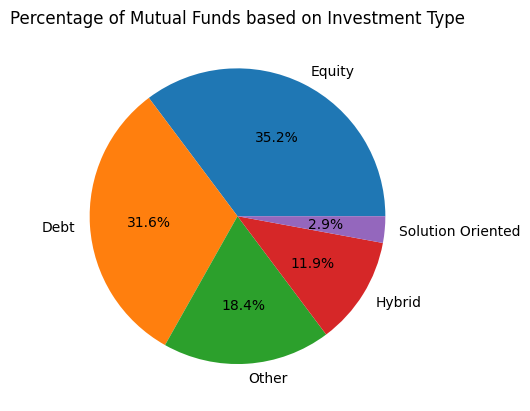

In [8]:
plt.title('Percentage of Mutual Funds based on Investment Type')
mf["Type"].value_counts().plot.pie(autopct="%.1f%%")
plt.ylabel('')
plt.show()

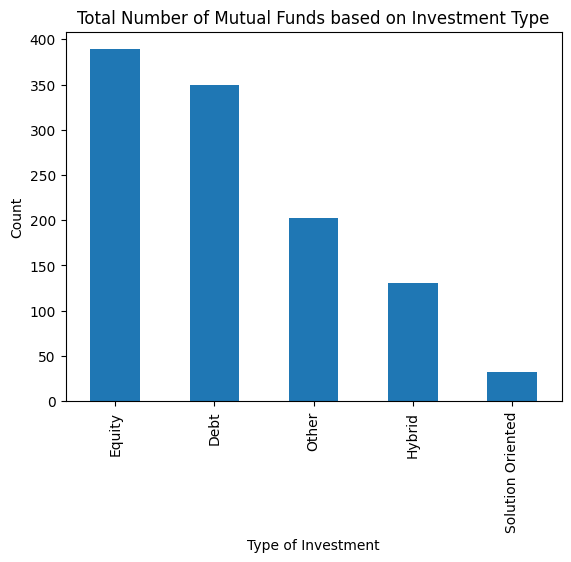

In [9]:
plt.title('Total Number of Mutual Funds based on Investment Type')
mf["Type"].value_counts().plot(kind='bar')
plt.xlabel('Type of Investment')
plt.ylabel('Count')
plt.show()

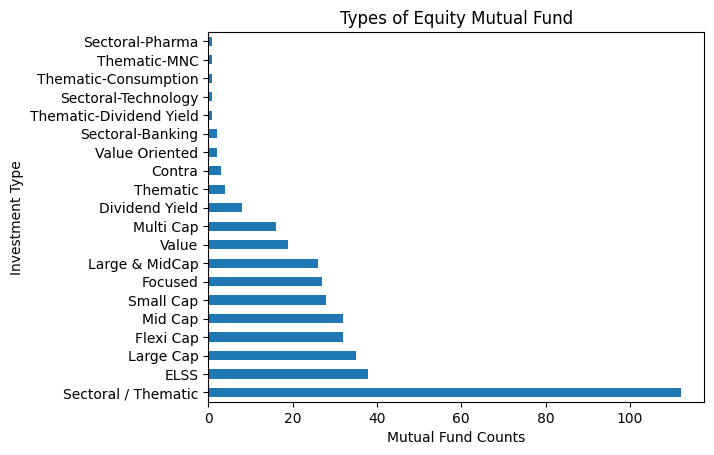

In [10]:
plt.title('Types of Equity Mutual Fund')
mf[mf['Type']=='Equity']['Investment Type'].value_counts().plot.barh()
plt.xlabel('Mutual Fund Counts')
plt.show()

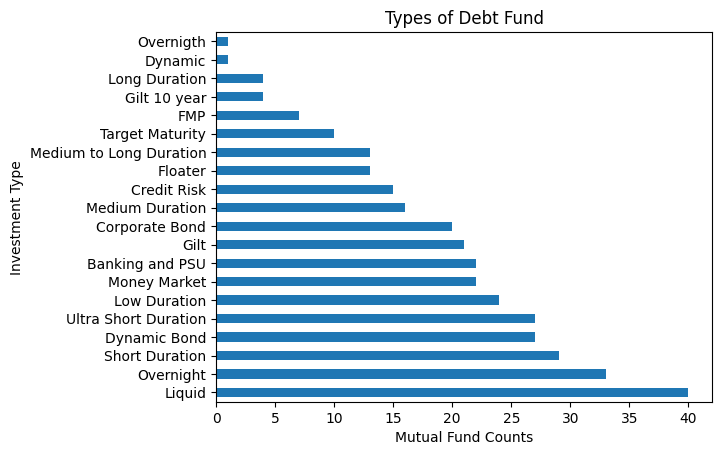

In [11]:
plt.title('Types of Debt Fund')
mf[mf['Type']=='Debt']['Investment Type'].value_counts().plot.barh()
plt.xlabel('Mutual Fund Counts')
plt.show()

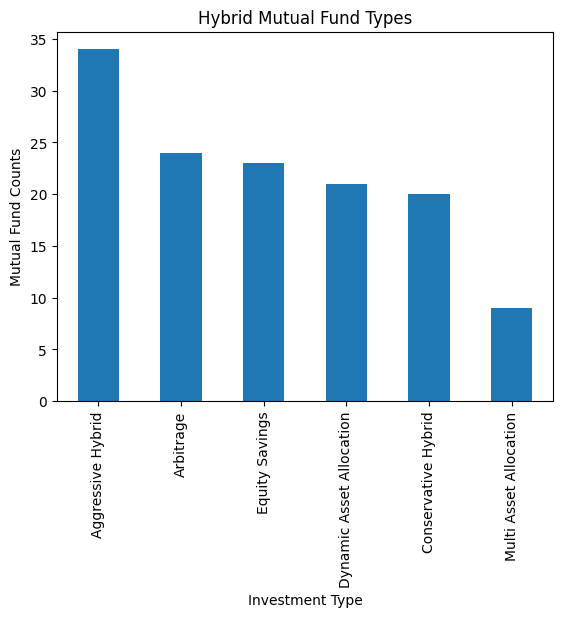

In [12]:
plt.title('Hybrid Mutual Fund Types')
mf[mf['Type']=='Hybrid']['Investment Type'].value_counts().plot.bar()
plt.ylabel('Mutual Fund Counts')
plt.show()

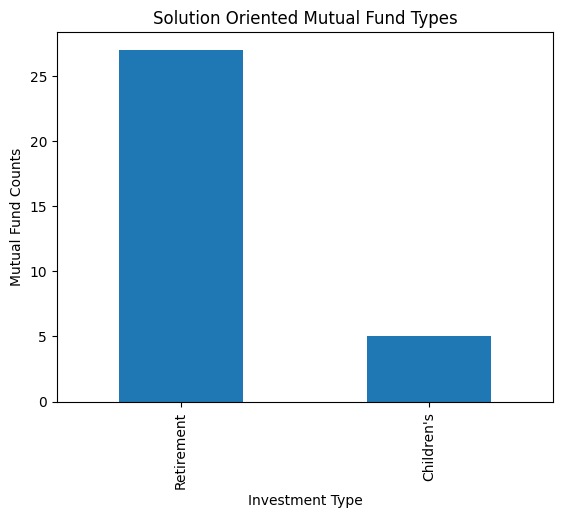

In [13]:
plt.title('Solution Oriented Mutual Fund Types')
mf[mf['Type']=='Solution Oriented']['Investment Type'].value_counts().plot.bar()
plt.ylabel('Mutual Fund Counts')
plt.show()

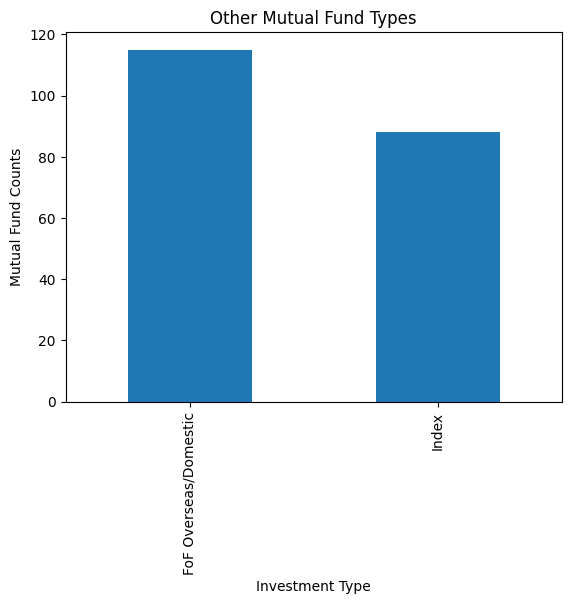

In [14]:
plt.title('Other Mutual Fund Types')
mf[mf['Type']=='Other']['Investment Type'].value_counts().plot.bar()
plt.ylabel('Mutual Fund Counts')
plt.show()

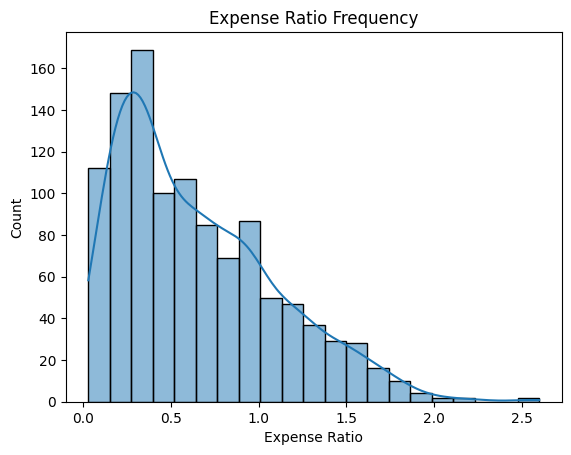

In [15]:
plt.title('Expense Ratio Frequency')
sns.histplot(mf['Expense Ratio'],kde=True)
plt.xlabel('Expense Ratio')
plt.show()

### Insights
1. Most Funds have Expense Ratio between 0 to 0.6
2. Very few funds have Expense Ratios more than 1.5
3. So we need to select a mutual fund which Expense Ratio is as minimum as possible

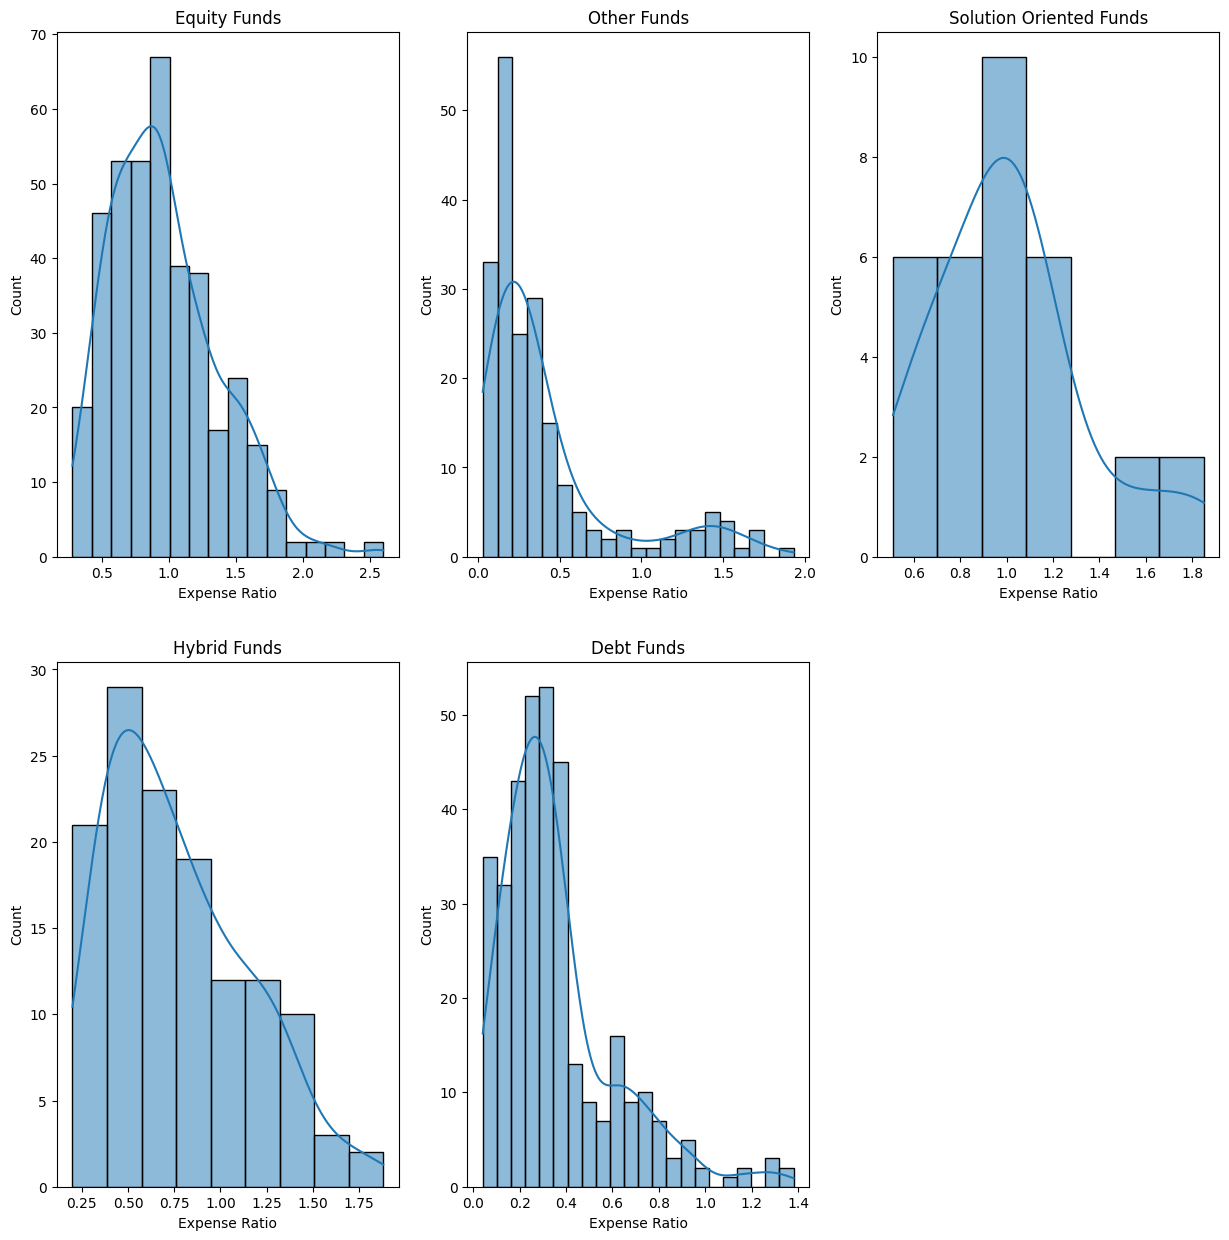

In [16]:
plt.figure(figsize=(15,15))
for i,j in enumerate(list(mf['Type'].unique())):
    tmp = mf[mf['Type']==j]
    plt.subplot(2,3,i+1)
    plt.title(f'{j} Funds')
    sns.histplot(tmp["Expense Ratio"],kde=True)

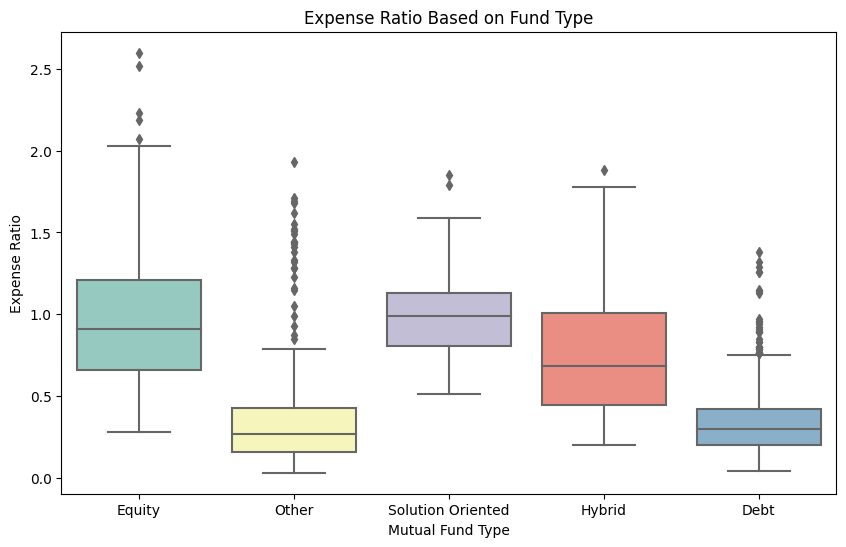

In [17]:
plt.figure(figsize=(10, 6))
plt.title('Expense Ratio Based on Fund Type')
sns.boxplot(x="Type", y="Expense Ratio", data=mf, palette="Set3")
plt.xlabel('Mutual Fund Type')
plt.show()

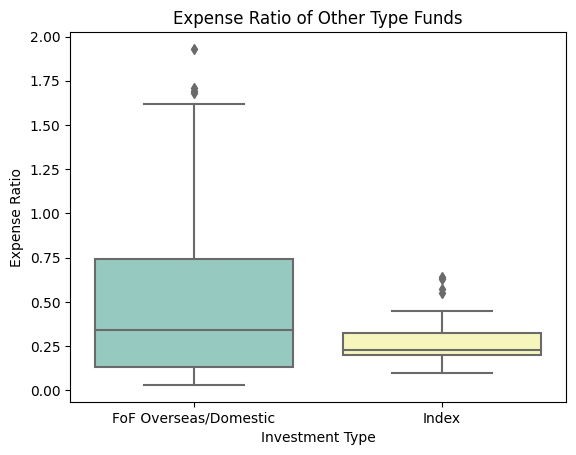

In [18]:
tmp = mf[mf['Type']=='Other']
sns.boxplot(x='Investment Type', y='Expense Ratio', data=tmp, palette="Set3")
plt.title('Expense Ratio of Other Type Funds')
plt.show()

In [19]:
# Average Retruns of Different type of Investement
mf.groupby('Type')[['1y_return','3y_return','5y_return','Total Return']].mean()

,1y_return,3y_return,5y_return,Total Return
Type,,,,
Debt,6.358085,13.711497,25.741260,80.979192
Equity,21.812901,86.777453,69.997675,260.494621
Hybrid,13.224278,44.911440,47.137884,139.025289
Other,15.638461,28.468395,28.144201,86.079865
Solution Oriented,15.808508,42.867246,28.013048,118.780763


### Insights
1. Average 1 year, 3 Year and 5 year Returns in Equity Funds are 21.812901, 86.777453, 69.997675
2. Average 1 year, 3 Year and 5 year Returns in Debt Funds are 6.358085, 13.711497, 25.741260
3. Average 1 year, 3 Year and 5 year Returns in Other Funds are 15.638461, 28.468395, 28.144201

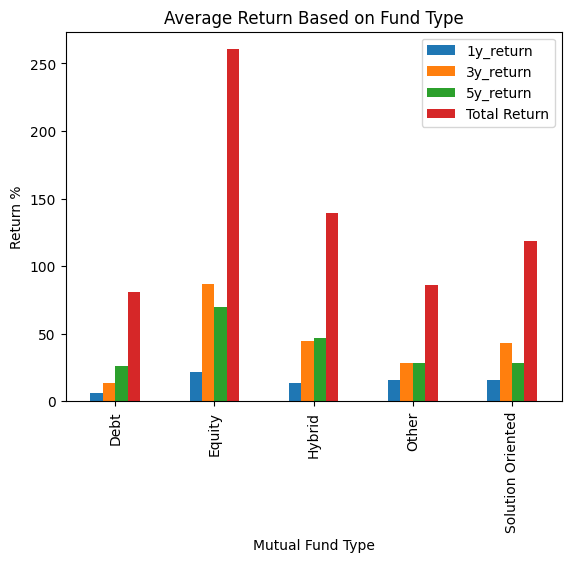

In [20]:
mf.groupby('Type')[['1y_return','3y_return','5y_return','Total Return']].mean().plot.bar()
plt.title('Average Return Based on Fund Type')
plt.xlabel('Mutual Fund Type')
plt.ylabel('Return %')
plt.show()

In [21]:
# Average Expense Ratio on Different types of Mutual Funds and their Returns
mf.groupby(['Type','Investment Type']).agg({'Expense Ratio':'mean','Total Return':'mean'}).sort_values(by='Expense Ratio')

Expense Ratio  Total Return
Type              Investment Type                                      
Debt              Overnight                      0.089091     23.349194
                  Liquid                         0.179025     85.681076
                  Target Maturity                0.195000      3.993100
                  Money Market                   0.214545     75.315449
                  FMP                            0.246334     13.387571
                  Dynamic                        0.251890      0.000000
Other             Index                          0.266250     83.311671
Debt              Gilt 10 year                   0.282500    125.450978
                  Floater                        0.283846     56.668350
                  Corporate Bond                 0.298000     86.146529
                  Banking and PSU                0.308636     91.658683
                  Low Duration                   0.337917     99.148090
                  Short Duration                 0.348966     95.680404
                  Overnigth                      0.358242      0.182000
Hybrid            Arbitrage                      0.358750     64.925238
Debt              Ultra Short Duration           0.379259     73.415201
                  Long Duration                  0.430000     49.605357
Equity            Sectoral-Banking               0.480000     12.797500
Other             FoF Overseas/Domestic          0.521564     88.198134
Debt              Gilt                           0.528571    129.277058
                  Dynamic Bond                   0.570408    101.647731
Equity            Value Oriented                 0.647167      9.441000
Debt              Medium Duration                0.693750     95.567657
Equity            Thematic                       0.712500     12.588750
Hybrid            Multi Asset Allocation         0.714444    182.031293
Debt              Medium to Long Duration        0.727692    113.066421
Equity            Contra                         0.733333    413.966110
                  Small Cap                      0.738214    358.250201
Hybrid            Dynamic Asset Allocation       0.738571    137.203691
Debt              Credit Risk                    0.740000    100.141386
Equity            Multi Cap                      0.775000    206.913526
                  Thematic-Dividend Yield        0.780000     13.850000
Hybrid            Equity Savings                 0.796087     95.080170
Equity            Mid Cap                        0.850313    347.340832
                  Flexi Cap                      0.855625    228.404246
                  Large & MidCap                 0.863077    327.474928
                  Focused                        0.927407    215.889989
Hybrid            Conservative Hybrid            0.930500    143.658487
                  Aggressive Hybrid              0.960000    208.074539
Equity            Sectoral-Technology            0.964334     -0.398000
                  Sectoral-Pharma                0.964334      0.793000
                  Thematic-Consumption           0.964334     -0.350000
Solution Oriented Retirement                     0.975463    106.061400
Equity            Large Cap                      0.995391    226.723253
                  ELSS                           0.999211    322.794011
                  Sectoral / Thematic            1.105982    239.808144
                  Value                          1.109474    276.855081
Solution Oriented Children's                     1.198000    187.465322
Equity            Dividend Yield                 1.245000    192.465634
                  Thematic-MNC                   1.290000     12.970000

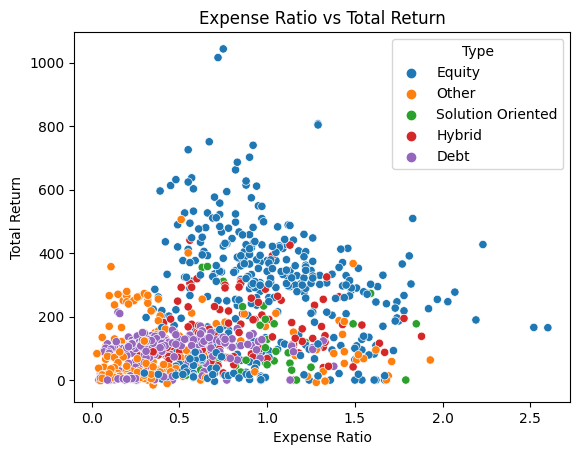

In [22]:
plt.title('Expense Ratio vs Total Return')
sns.scatterplot(x=mf["Expense Ratio"],y=mf["Total Return"],hue=mf['Type'])
plt.xlabel('Expense Ratio')
plt.ylabel('Total Return')
plt.show()

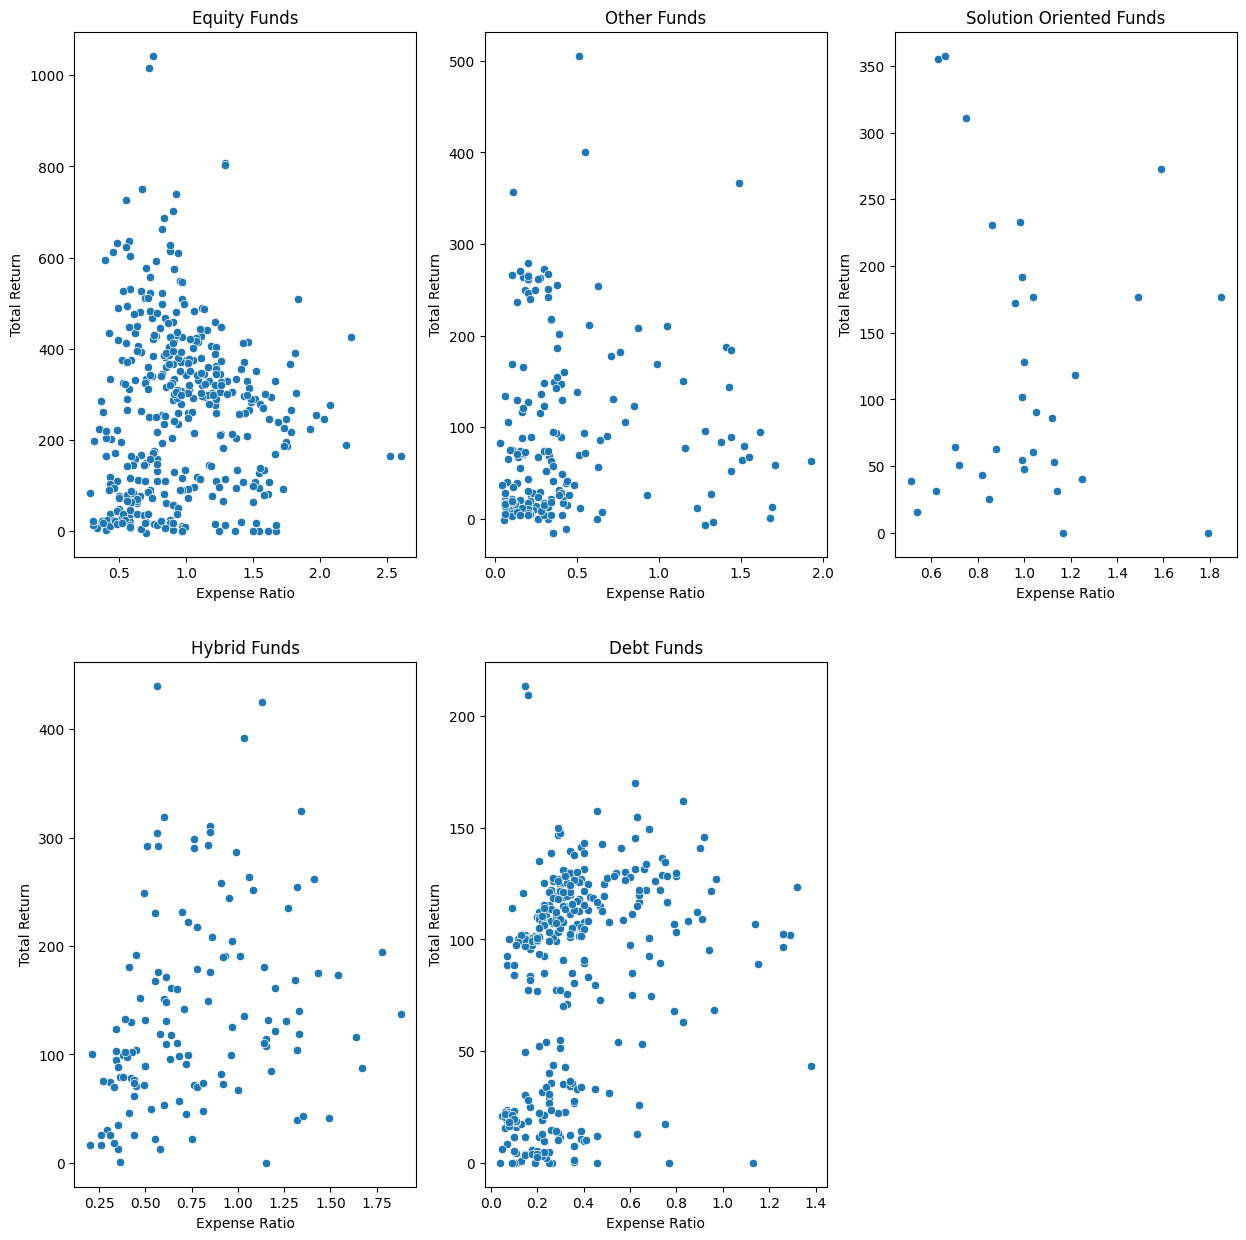

In [23]:
plt.figure(figsize=(15,15))
for i,j in enumerate(list(mf['Type'].unique())):
    tmp = mf[mf['Type']==j]
    plt.subplot(2,3,i+1)
    plt.title(f'{j} Funds')
    sns.scatterplot(x=tmp["Expense Ratio"],y=tmp["Total Return"])

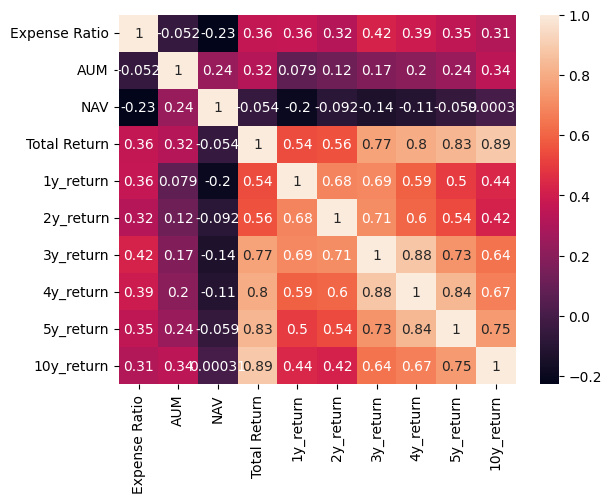

In [24]:
sns.heatmap(mf[['Expense Ratio','AUM','NAV','Total Return','1y_return', '2y_return', '3y_return', '4y_return', '5y_return','10y_return']].corr(),annot=True)
plt.show()

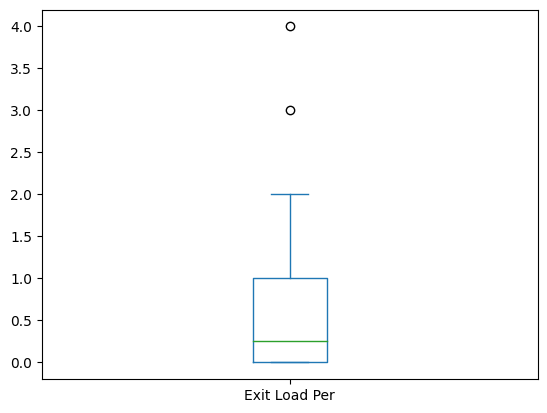

In [25]:
mf['Exit Load Per'].plot(kind='box')
plt.show()

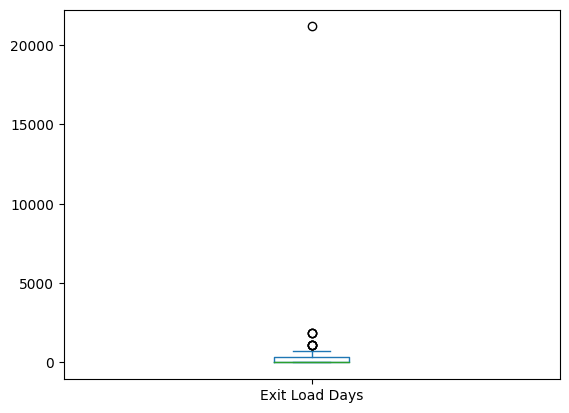

In [26]:
mf['Exit Load Days'].plot(kind='box')
plt.show()

In [27]:
mf[mf['Exit Load Days']>1000]

,AMC Name,AMC Launch Date,Mutual Fund Name,AUM,Type,Scheme Launch Date,Expense Ratio,Investment Type,NAV,Minimum Investment,...,Total Return,1m_return,1y_return,2y_return,3y_return,4y_return,5y_return,10y_return,Exit Load Per,Exit Load Days
352,Tata,1995-06-30,Tata Retirement Savings Fund Progressive Plan ...,1426.616565,Solution Oriented,2013-01-09,0.63,Retirement,55.7684,5000,...,355.064851,5.908247,21.655123,19.364630,66.801590,78.143931,72.245717,379.595492,1.00,1830
380,Tata,1995-06-30,Tata Retirement Savings Fund Moderate Plan Dir...,1684.208690,Solution Oriented,2013-01-09,0.66,Retirement,55.3805,5000,...,357.748767,5.258597,20.361568,21.108718,61.812404,75.243342,69.676822,371.037959,1.00,1830
415,FRANKLIN_TEMPLETON,1996-02-19,Franklin India Multi Asset Solution Fund of Fu...,47.156808,Other,2014-11-28,0.32,FoF Overseas/Domestic,17.3908,5000,...,73.447000,2.414412,11.780135,19.100329,54.756997,28.961671,35.324683,0.000000,1.00,1095
442,SBI,1987-06-29,SBI Magnum Children's Benefit Fund Savings ...,96.299800,Solution Oriented,2013-01-04,0.86,Children's,91.7452,5000,...,231.129844,1.454403,12.428675,17.441377,48.550073,57.603960,61.307866,263.564783,1.00,1095
497,FRANKLIN_TEMPLETON,1996-02-19,Franklin India Pension Direct Plan Growth,460.406641,Solution Oriented,2013-01-01,1.49,Retirement,188.6484,500,...,176.991302,2.658663,12.947470,14.651270,34.413323,41.342050,49.247408,176.507374,3.00,21170
523,BIRLA_SUN_LIFE,1994-12-23,Aditya Birla Sun Life Credit Risk Fund Direct ...,1020.741000,Debt,2015-04-17,0.68,Credit Risk,19.2868,100,...,92.684000,0.585711,7.765703,15.995738,27.780467,32.776549,42.069057,0.000000,1.00,1095
527,Tata,1995-06-30,Tata Retirement Savings Fund Conservative Plan...,164.760778,Solution Oriented,2013-01-09,0.96,Retirement,30.4179,5000,...,172.645748,2.210710,10.826218,12.148521,26.689151,39.582131,46.961518,165.220874,1.00,1830
547,SBI,1987-06-29,SBI Credit Risk Fund Direct Growth,2773.044900,Debt,2013-01-02,0.90,Credit Risk,41.9765,5000,...,140.811205,0.599752,8.888958,13.594905,22.383647,34.094935,43.582202,129.410252,0.75,1080
1008,SBI,1987-06-29,SBI Magnum Children's Benefit Fund Investmen...,1024.228700,Solution Oriented,2020-09-29,0.99,Children's,29.1991,5000,...,191.453000,5.444948,26.145556,50.649733,0.000000,0.000000,0.000000,0.000000,1.00,1095


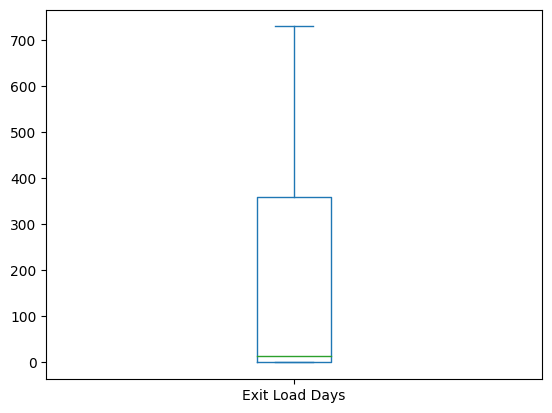

In [28]:
mf[mf['Exit Load Days']<1000]['Exit Load Days'].plot(kind='box')
plt.show()

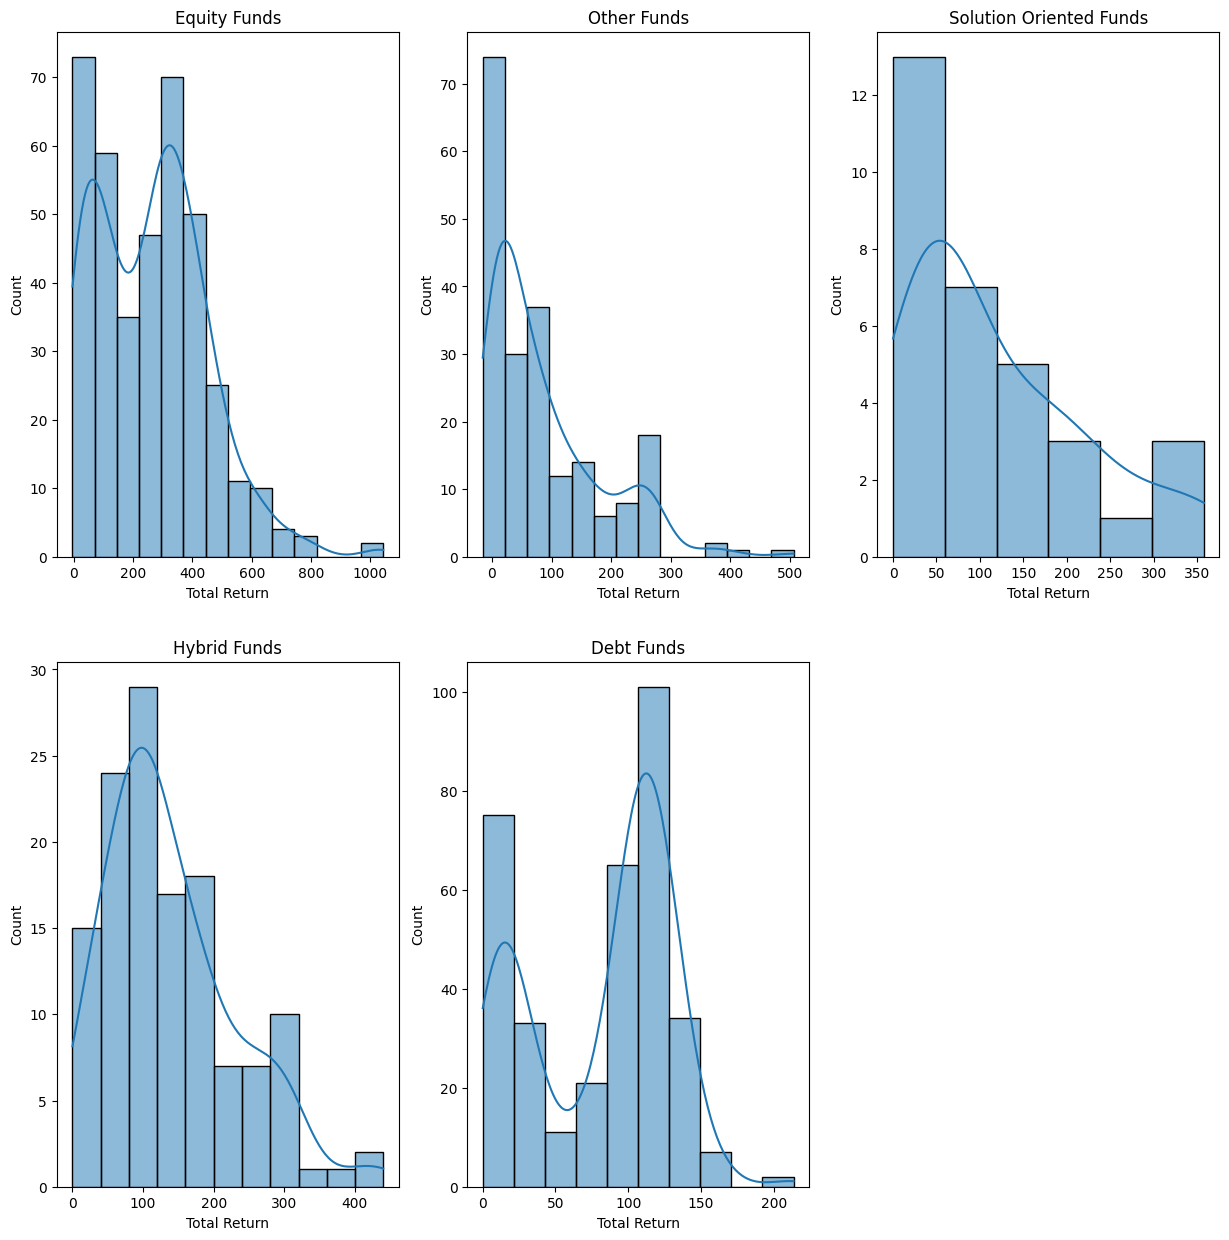

In [29]:
#sns.histplot(mf['1y_return'],kde=True)
plt.figure(figsize=(15,15))
for i,j in enumerate(list(mf['Type'].unique())):
    tmp = mf[mf['Type']==j]
    plt.subplot(2,3,i+1)
    plt.title(f'{j} Funds')
    sns.histplot(tmp["Total Return"],kde=True)

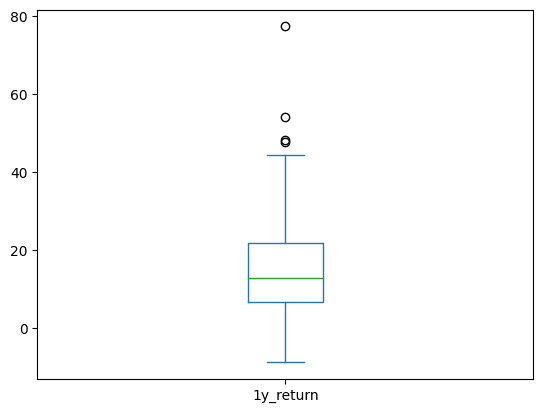

In [30]:
mf['1y_return'].plot(kind='box')
plt.show()

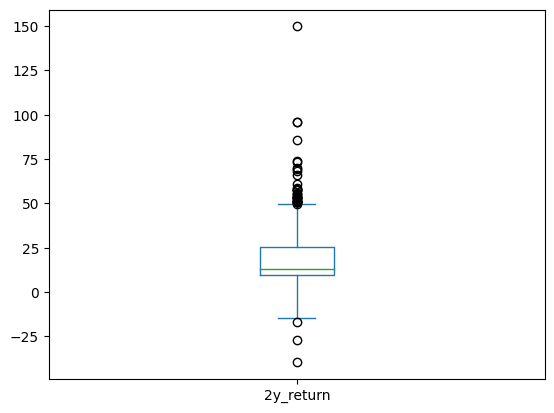

In [31]:
mf['2y_return'].plot(kind='box')
plt.show()

In [32]:
mf[mf['1y_return'] > 60]

,AMC Name,AMC Launch Date,Mutual Fund Name,AUM,Type,Scheme Launch Date,Expense Ratio,Investment Type,NAV,Minimum Investment,...,Total Return,1m_return,1y_return,2y_return,3y_return,4y_return,5y_return,10y_return,Exit Load Per,Exit Load Days
1011,Sundaram,1996-02-26,Principal Small Cap Fund Direct Growth,512.8835,Equity,2019-05-13,0.73,Small Cap,25.9052,5000,...,159.052,4.204344,77.311431,149.809065,0.0,0.0,0.0,0.0,1.0,365


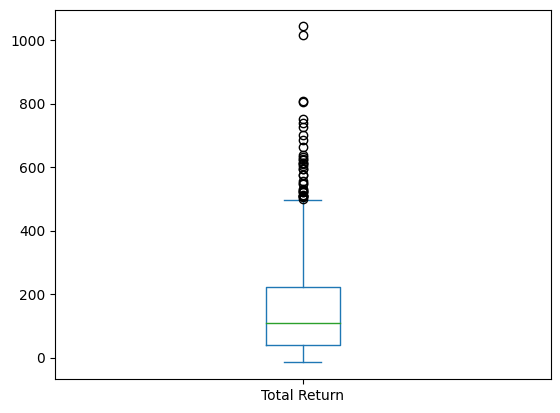

In [33]:
mf['Total Return'].plot(kind='box')
plt.show()

In [34]:
mf['Type'].unique()

array(['Equity', 'Other', 'Solution Oriented', 'Hybrid', 'Debt'],
      dtype=object)

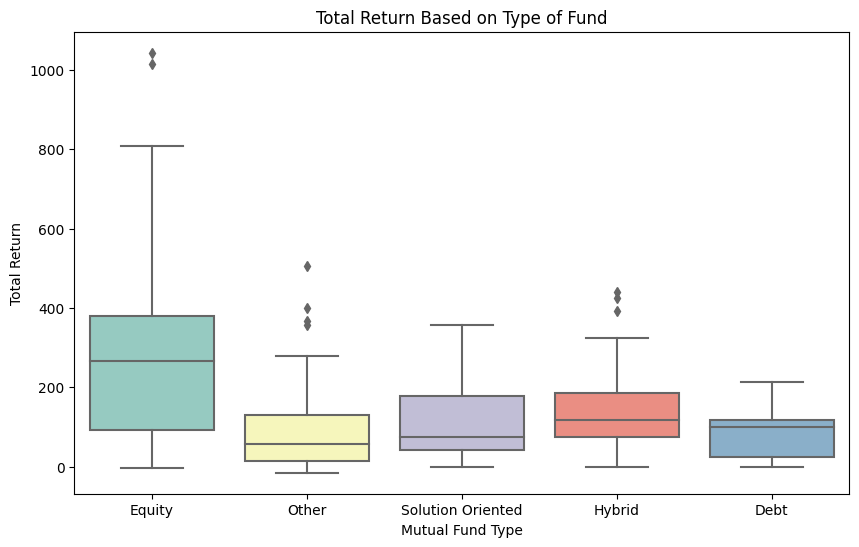

In [35]:
plt.figure(figsize=(10, 6))
plt.title('Total Return Based on Type of Fund')
sns.boxplot(x="Type", y="Total Return", data=mf, palette="Set3")
plt.xlabel('Mutual Fund Type')
plt.show()

#### insights
1. From this Graph we can clearly understand that Changes of getting higher returns for long term is possible in Equity funds.
2. If we choose Solution oriented or Debt funds then change of getting unexpected return is minimum.

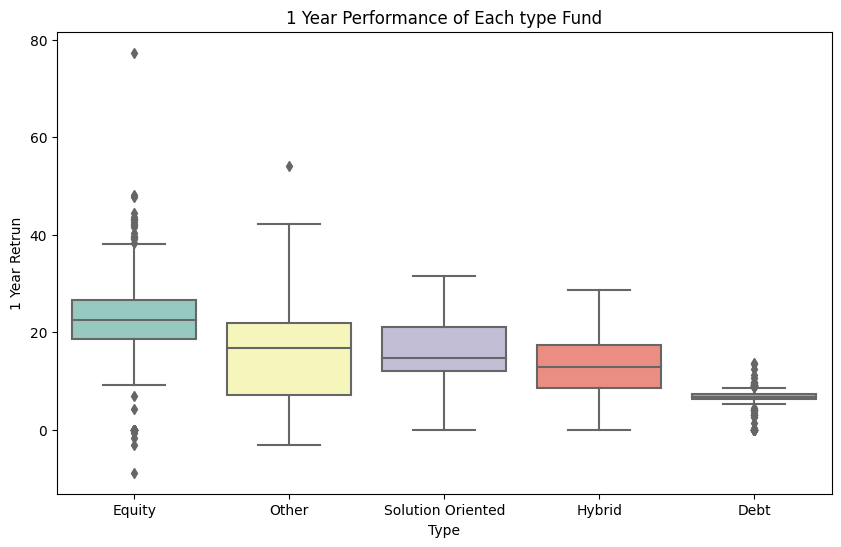

In [36]:
plt.figure(figsize=(10, 6))
plt.title('1 Year Performance of Each type Fund')
sns.boxplot(x="Type", y="1y_return", data=mf, palette="Set3")
plt.ylabel('1 Year Retrun')
plt.show()

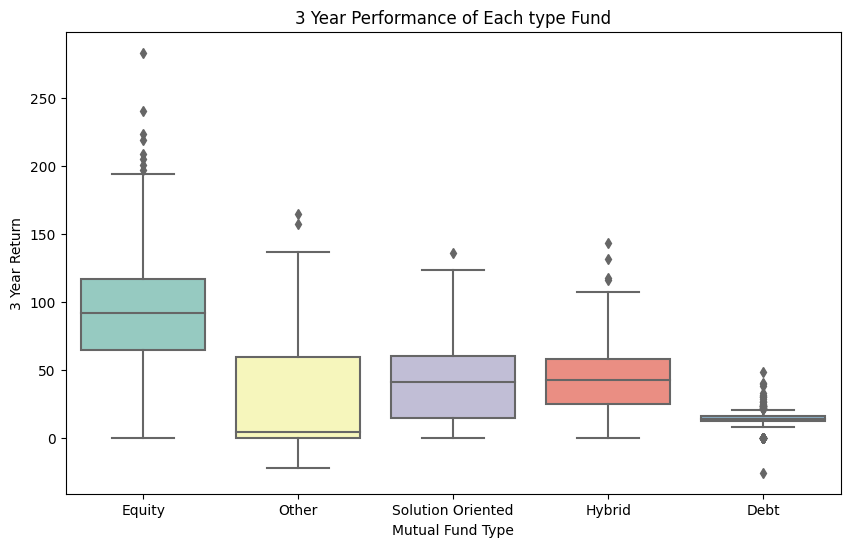

In [37]:
plt.figure(figsize=(10, 6))
plt.title('3 Year Performance of Each type Fund')
sns.boxplot(x="Type", y="3y_return", data=mf, palette="Set3")
plt.ylabel('3 Year Return')
plt.xlabel('Mutual Fund Type')
plt.show()

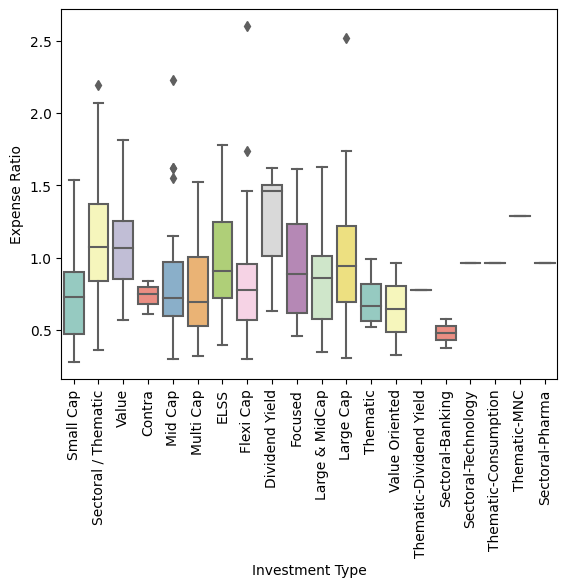

In [38]:
tmp = mf[mf['Type']=='Equity']
sns.boxplot(x='Investment Type', y='Expense Ratio', data=tmp, palette="Set3")
plt.xticks(rotation=90)
plt.show()

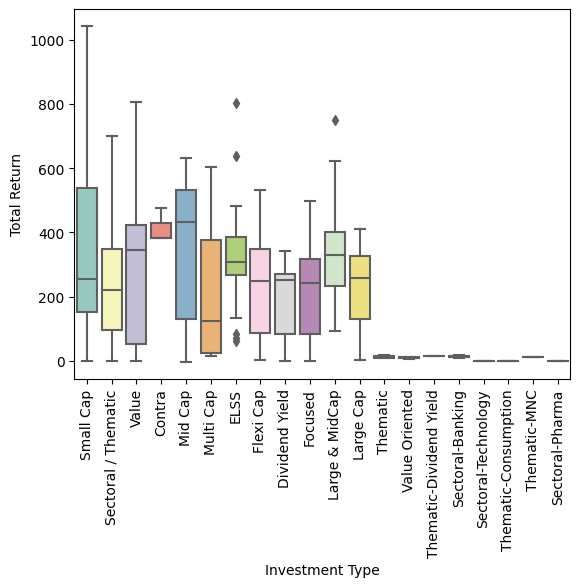

In [39]:
sns.boxplot(x='Investment Type', y='Total Return', data=tmp, palette="Set3")
plt.xticks(rotation=90)
plt.show()

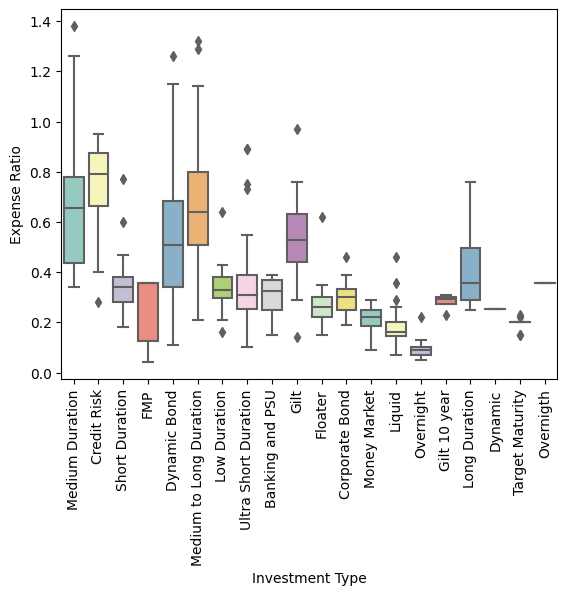

In [40]:
tmp = mf[mf['Type']=='Debt']
sns.boxplot(x='Investment Type', y='Expense Ratio', data=tmp, palette="Set3")
plt.xticks(rotation=90)
plt.show()

In [41]:
tmp = mf[(mf['Type']=='Other')&(mf['Investment Type']=='Index')].sort_values(by='Total Return',ascending=False)[:20]
fig = ex.bar(data_frame=tmp, x='Mutual Fund Name', y='Total Return',hover_data=['NAV','AUM','Exit Load Per'],
             color='Expense Ratio',title="Top 20 Index Fund based on Total Return")
fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'customdata': array([[6.07145500e+02, 5.07088330e+03, 2.50000000e-01],
                                   [4.09390000e+01, 2.84498910e+03, 0.00000000e+00],
                                   [3.47727000e+01, 4.76590500e+02, 2.50000000e-01],
                                   [3.59434000e+01, 5.61004000e+01, 0.00000000e+00],
                                   [1.84412700e+02, 8.97299610e+03, 2.50000000e-01],
                                   [4.24346000e+01, 8.07507200e+02, 0.00000000e+00],
                                   [1.29356800e+02, 4.54847076e+02, 2.50000000e-01],
                                   [1.99397500e+02, 4.82189609e+03, 0.00000000e+00],
                                   [1.71850900e+02, 2.49593657e+02, 2.50000000e-01],
                                   [3.49682000e+01, 9.43096700e+02, 2.50000000e-01],
                                   [1.32468000e+02, 1.15858470e+04, 0.00000000e+00],
          

In [42]:
tmp = mf[(mf['Type']=='Other')&(mf['Investment Type']=='Index')].sort_values(by='5y_return',ascending=False)[:20]
fig = ex.bar(data_frame=tmp, x='Mutual Fund Name', y='5y_return',hover_data=['NAV','AUM','Exit Load Per'],color='Expense Ratio')
fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'customdata': array([[3.47727000e+01, 4.76590500e+02, 2.50000000e-01],
                                   [2.11774000e+01, 1.03114643e+03, 0.00000000e+00],
                                   [6.07145500e+02, 5.07088330e+03, 2.50000000e-01],
                                   [1.86584000e+01, 6.20519000e+02, 0.00000000e+00],
                                   [1.71850900e+02, 2.49593657e+02, 2.50000000e-01],
                                   [4.24346000e+01, 8.07507200e+02, 0.00000000e+00],
                                   [1.28985000e+02, 7.15556000e+01, 2.50000000e-01],
                                   [1.32468000e+02, 1.15858470e+04, 0.00000000e+00],
                                   [1.29356800e+02, 4.54847076e+02, 2.50000000e-01],
                                   [1.99397500e+02, 4.82189609e+03, 0.00000000e+00],
                                   [1.84412700e+02, 8.97299610e+03, 2.50000000e-01],
          

In [43]:
mf[(mf['Mutual Fund Name']=='Nippon India Index Fund S&P BSE Sensex Plan Direct Growth')|
(mf['Mutual Fund Name']=='ICICI Prudential S&P BSE Sensex Index Fund Direct   Growth')][:][['AMC Name','Mutual Fund Name','AUM','Scheme Launch Date','Expense Ratio','NAV','Exit Load Per', 
    'Exit Load Days','Minimum Investment', 'Minimum SIP Amount', 'Total Return', '1m_return','1y_return', 
    '2y_return', '3y_return', '4y_return', '5y_return']]

,AMC Name,Mutual Fund Name,AUM,Scheme Launch Date,Expense Ratio,NAV,Exit Load Per,Exit Load Days,Minimum Investment,Minimum SIP Amount,Total Return,1m_return,1y_return,2y_return,3y_return,4y_return,5y_return
293,RELIANCE,Nippon India Index Fund S&P BSE Sensex Plan Di...,476.590500,2013-01-01,0.15,34.7727,0.25,7,5000,100,270.141792,6.023009,21.918666,28.865372,79.77269,82.656515,88.490894
299,ICICI_PRUDENTIAL,ICICI Prudential S&P BSE Sensex Index Fund Dir...,1031.146431,2017-09-21,0.16,21.1774,0.00,0,100,100,116.376000,6.024569,21.823044,28.547325,79.16815,82.839567,88.398781


### Best Index Funds
* Nippon India Index Fund S&P BSE Sensex Plan Direct Growth
    * Positives
        * Fund Launched 2013
        * Very Low Expense Ratio
        * SIP Amount start from Rs.100
    * Negatives
        * Exit Load 0.25% if exit within 7 days.
        * Minimum One Time Investment need Rs.5000
        * AUM was less than 500cr.
          
* ICICI Prudential S&P BSE Sensex Index Fund Direct Growth
    * Positives
        * AUM was more than 1000cr.
        * Very Low Expense Ratio
        * No Exit Load
        * SIP Amount start from Rs.100
        * Minimum One Time Investment need Rs.100
    * Negatives
        * Scheme launched on 2017

In [44]:
tmp = mf[(mf['Type']=='Other')&(mf['Investment Type']=='Index')].sort_values(by='Total Return',ascending=False)[:10]
fig = ex.bar(data_frame=tmp, x='Mutual Fund Name', y='Total Return',hover_data=['NAV','AUM','Exit Load Per'],
             color='Expense Ratio',title="Top 10 Index Fund based on Total Return")
fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'customdata': array([[6.07145500e+02, 5.07088330e+03, 2.50000000e-01],
                                   [4.09390000e+01, 2.84498910e+03, 0.00000000e+00],
                                   [3.47727000e+01, 4.76590500e+02, 2.50000000e-01],
                                   [3.59434000e+01, 5.61004000e+01, 0.00000000e+00],
                                   [1.84412700e+02, 8.97299610e+03, 2.50000000e-01],
                                   [4.24346000e+01, 8.07507200e+02, 0.00000000e+00],
                                   [1.29356800e+02, 4.54847076e+02, 2.50000000e-01],
                                   [1.99397500e+02, 4.82189609e+03, 0.00000000e+00],
                                   [1.71850900e+02, 2.49593657e+02, 2.50000000e-01],
                                   [3.49682000e+01, 9.43096700e+02, 2.50000000e-01]]),
              'hovertemplate': ('Mutual Fund Name=%{x}<br>Total' ... '%{marker.color}<extra><

In [45]:
tmp = mf[(mf['Type']=='Equity')&(mf['Investment Type']=='Large Cap')].sort_values(by='Total Return',ascending=False)[:10]
fig = ex.bar(data_frame=tmp, x='Mutual Fund Name', y='Total Return',hover_data=['NAV','AUM','Exit Load Per']
             ,color='Expense Ratio',title="Top 10 Large Cap Fund based on Total Return")
fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'customdata': array([[9.55670000e+01, 3.55476094e+04, 1.00000000e+00],
                                   [6.99106000e+01, 1.47692532e+04, 1.00000000e+00],
                                   [7.70012000e+01, 3.83380421e+04, 1.00000000e+00],
                                   [1.78270600e+02, 1.45828280e+03, 1.00000000e+00],
                                   [8.36400000e+01, 3.87341066e+04, 1.00000000e+00],
                                   [5.71200000e+01, 8.00655800e+02, 0.00000000e+00],
                                   [5.19000000e+01, 9.94614360e+03, 1.00000000e+00],
                                   [7.01300000e+01, 5.00739702e+02, 1.00000000e+00],
                                   [5.23100000e+01, 3.39870106e+04, 1.00000000e+00],
                                   [4.66357000e+02, 6.08089490e+03, 1.00000000e+00]]),
              'hovertemplate': ('Mutual Fund Name=%{x}<br>Total' ... '%{marker.color}<extra><

In [46]:
tmp = mf[mf['Type']=='Equity'].sort_values(by='Total Return',ascending=False)[:20]
fig = ex.bar(data_frame=tmp, x='Mutual Fund Name', y='Total Return',hover_data=['NAV','AUM','Exit Load Per']
             ,color='Expense Ratio',title='Top 20 Equtiy Fund Based on Total Return')
fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'customdata': array([[1.26542900e+02, 3.19451480e+04, 1.00000000e+00],
                                   [1.45079500e+02, 1.86245386e+04, 1.00000000e+00],
                                   [9.00700000e+01, 9.02562600e+02, 1.00000000e+00],
                                   [8.97500000e+01, 1.32246000e+02, 0.00000000e+00],
                                   [1.19459000e+02, 2.66842643e+04, 1.00000000e+00],
                                   [1.49384000e+02, 1.07638512e+04, 1.00000000e+00],
                                   [8.34400000e+01, 1.42517150e+04, 1.00000000e+00],
                                   [1.56960000e+02, 1.06417827e+04, 1.00000000e+00],
                                   [1.44170000e+02, 3.64309640e+03, 1.00000000e+00],
                                   [1.31240300e+02, 8.57690366e+03, 1.00000000e+00],
                                   [2.87287100e+02, 4.04939290e+03, 0.00000000e+00],
          

In [47]:
tmp = mf[mf['Type']=='Equity'].sort_values(by='3y_return',ascending=False)[:15]
fig = ex.bar(data_frame=tmp, x='Mutual Fund Name', y='3y_return',hover_data=['NAV','AUM','Exit Load Per'],color='Expense Ratio'
            ,title='Top 15 Equtiy Fund Based on 3 Year Return')
fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'customdata': array([[1.83732700e+02, 5.56526402e+03, 1.00000000e+00],
                                   [2.67992000e+01, 9.24574701e+02, 5.00000000e-01],
                                   [1.26542900e+02, 3.19451480e+04, 1.00000000e+00],
                                   [3.15200000e+01, 9.94134033e+02, 1.00000000e+00],
                                   [6.23954000e+01, 1.01294083e+04, 1.00000000e+00],
                                   [1.10954000e+02, 1.89990489e+04, 1.00000000e+00],
                                   [3.02400000e+01, 6.58728170e+03, 1.00000000e+00],
                                   [1.28280000e+02, 2.66004015e+03, 1.00000000e+00],
                                   [3.06126000e+01, 5.23347700e+03, 1.00000000e+00],
                                   [7.04500000e+01, 6.04732462e+03, 1.00000000e+00],
                                   [1.31240300e+02, 8.57690366e+03, 1.00000000e+00],
          

In [48]:
tmp = mf[mf['Type']=='Equity'].sort_values(by='5y_return',ascending=False)[:15]
fig = ex.bar(data_frame=tmp, x='Mutual Fund Name', y='5y_return',hover_data=['NAV','AUM','Exit Load Per']
             ,color='Expense Ratio',title='Top 15 Equtiy Fund Based on 5 Year Return')
fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'customdata': array([[1.83732700e+02, 5.56526402e+03, 1.00000000e+00],
                                   [2.67992000e+01, 9.24574701e+02, 5.00000000e-01],
                                   [2.87287100e+02, 4.04939290e+03, 0.00000000e+00],
                                   [8.34400000e+01, 1.42517150e+04, 1.00000000e+00],
                                   [1.67617100e+02, 2.18828430e+03, 5.00000000e-01],
                                   [1.26542900e+02, 3.19451480e+04, 1.00000000e+00],
                                   [5.15942100e+02, 4.78709251e+03, 0.00000000e+00],
                                   [2.19378000e+02, 1.08296832e+04, 1.00000000e+00],
                                   [7.47192000e+01, 1.61160640e+03, 0.00000000e+00],
                                   [7.04500000e+01, 6.04732462e+03, 1.00000000e+00],
                                   [1.44170000e+02, 3.64309640e+03, 1.00000000e+00],
          

In [49]:
mf[(mf['Mutual Fund Name']=='Axis Small Cap Fund Direct Growth')|
(mf['Mutual Fund Name']=='Kotak Small Cap Fund Direct Growth')][:][['AMC Name','Mutual Fund Name','AUM','Scheme Launch Date','Expense Ratio','NAV','Exit Load Per', 
    'Exit Load Days','Minimum Investment', 'Minimum SIP Amount', 'Total Return', '1m_return','1y_return', 
    '2y_return', '3y_return', '4y_return', '5y_return']]

,AMC Name,Mutual Fund Name,AUM,Scheme Launch Date,Expense Ratio,NAV,Exit Load Per,Exit Load Days,Minimum Investment,Minimum SIP Amount,Total Return,1m_return,1y_return,2y_return,3y_return,4y_return,5y_return
11,KOTAK_MAHINDRA,Kotak Small Cap Fund Direct Growth,10829.683200,2013-01-01,0.45,219.378,1.0,365,100,100,612.825638,4.456118,23.101692,30.940643,190.586428,201.689203,176.939235
37,Axis,Axis Small Cap Fund Direct Growth,14251.715001,2013-11-29,0.55,83.440,1.0,360,500,100,725.500000,2.393947,26.049779,35.951910,160.574495,176.271754,190.669014


### Best Equity Funds
* Kotak Small Cap Fund Direct Growth
    * Positives
        * AUM was more than 1000cr
        * SIP Amount start from Rs.100
        * Minimum One Time Investment need Rs.100
    * Negatives
        * Exit Load 1% if exit within 1 year.

* Axis Small Cap Fund Direct Growth
    * Positives
        * AUM was more than 1000cr.
        * SIP Amount start from Rs.100
    * Negatives
        * Minimum One Time Investment need Rs.500
        * Exit Load 1% if exit within 1 year.

In [50]:
tmp = mf[mf['Type']=='Other'].sort_values(by='3y_return',ascending=False)[:10]
fig = ex.bar(data_frame=tmp, x='Mutual Fund Name', y='3y_return',hover_data=['NAV','AUM','Exit Load Per'],color='Expense Ratio')
fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'customdata': array([[2.05075000e+01, 1.63079976e+02, 0.00000000e+00],
                                   [2.50113000e+01, 3.51484900e+02, 0.00000000e+00],
                                   [2.50525000e+01, 8.46895000e+02, 0.00000000e+00],
                                   [1.60586600e+02, 1.17836691e+03, 1.00000000e+00],
                                   [2.07073000e+01, 7.25340489e+01, 1.00000000e+00],
                                   [1.86584000e+01, 6.20519000e+02, 0.00000000e+00],
                                   [1.64643000e+01, 4.15415100e+02, 1.00000000e+00],
                                   [4.92461000e+01, 3.80311000e+01, 1.00000000e+00],
                                   [1.19812200e+02, 1.12435589e+02, 1.00000000e+00],
                                   [1.92793000e+01, 4.80660000e+02, 1.00000000e+00]]),
              'hovertemplate': ('Mutual Fund Name=%{x}<br>3y_re' ... '%{marker.color}<extra><

In [51]:
tmp

,AMC Name,AMC Launch Date,Mutual Fund Name,AUM,Type,Scheme Launch Date,Expense Ratio,Investment Type,NAV,Minimum Investment,...,Total Return,1m_return,1y_return,2y_return,3y_return,4y_return,5y_return,10y_return,Exit Load Per,Exit Load Days
25,ICICI_PRUDENTIAL,1993-10-12,ICICI Prudential BHARAT 22 FOF Direct Growth,163.079976,Other,2018-06-29,0.08,FoF Overseas/Domestic,20.5075,5000,...,106.041000,7.628057,42.131549,73.174258,164.541766,95.072096,99.383582,0.000000,0.0,0
40,MOTILAL_OSWAL,2009-12-29,Motilal Oswal Nifty Smallcap 250 Index Fund Di...,351.484900,Other,2019-09-06,0.36,Index,25.0113,500,...,148.819000,7.352757,30.147032,23.684093,157.704657,0.000000,0.000000,0.000000,0.0,0
60,MOTILAL_OSWAL,2009-12-29,Motilal Oswal Nifty Midcap 150 Index Fund Dire...,846.895000,Other,2019-09-06,0.30,Index,25.0525,500,...,148.662000,5.293423,28.098373,34.660832,137.001525,0.000000,0.000000,0.000000,0.0,0
77,ICICI_PRUDENTIAL,1993-10-12,ICICI Prudential Thematic Advantage Fund (FOF)...,1178.366907,Other,2013-04-04,0.34,FoF Overseas/Domestic,160.5866,5000,...,217.083878,5.513449,23.620774,32.732975,126.898581,127.387979,118.502293,0.000000,1.0,365
76,ICICI_PRUDENTIAL,1993-10-12,ICICI Prudential India Equity FOF Direct Growth,72.534049,Other,2020-02-25,0.79,FoF Overseas/Domestic,20.7073,500,...,105.495000,5.883777,20.922802,33.788420,120.964742,0.000000,0.000000,0.000000,1.0,360
139,DSP,1996-12-16,DSP Nifty 50 Equal Weight Index Fund Direct ...,620.519000,Other,2017-10-23,0.40,Index,18.6584,100,...,88.921000,5.124310,23.053925,31.316424,111.396697,95.736547,87.932475,0.000000,0.0,0
140,MOTILAL_OSWAL,2009-12-29,Motilal Oswal Nifty Bank Index Fund Direct G...,415.415100,Other,2019-09-06,0.33,Index,16.4643,500,...,68.532000,5.478852,27.366989,33.115334,103.910466,0.000000,0.000000,0.000000,1.0,15
189,Sundaram,1996-02-26,Principal Global Opportunities Fund Direct Growth,38.031100,Other,2013-01-02,0.85,FoF Overseas/Domestic,49.2461,10000,...,123.064171,0.006905,26.438691,47.900843,96.461812,66.961401,119.471444,0.000000,1.0,365
193,ICICI_PRUDENTIAL,1993-10-12,ICICI Prudential Passive Strategy Fund (FOF) D...,112.435589,Other,2013-01-01,0.13,FoF Overseas/Domestic,119.8122,5000,...,236.660456,5.239378,24.721603,28.697397,96.012270,83.843399,80.312666,264.159733,1.0,15
229,MOTILAL_OSWAL,2009-12-29,Motilal Oswal Nifty 500 Index Fund Direct Gr...,480.660000,Other,2019-09-06,0.37,Index,19.2793,500,...,94.027000,5.735056,20.633549,25.714823,89.302022,0.000000,0.000000,0.000000,1.0,15


In [52]:
tmp = mf[(mf['Type']=='Debt')].sort_values(by='Total Return',ascending=False)[:20]
fig = ex.bar(data_frame=tmp, x='Mutual Fund Name', y='Total Return',hover_data=['NAV','AUM','Exit Load Per']
             ,color='Expense Ratio',title="Top 20 Debt Fund based on Total Return")
fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'customdata': array([[3.16288080e+03, 7.43086910e+03, 7.00000000e-03],
                                   [3.09820000e+01, 5.82912400e+02, 7.00000000e-03],
                                   [3.38007000e+01, 1.06004927e+04, 2.50000000e-01],
                                   [3.52689000e+01, 1.87850380e+03, 1.00000000e+00],
                                   [5.95537000e+01, 6.89307190e+03, 0.00000000e+00],
                                   [3.66838000e+01, 1.40942740e+03, 2.50000000e-01],
                                   [3.65850000e+01, 1.40942740e+03, 2.50000000e-01],
                                   [3.91722000e+01, 3.04047500e+02, 0.00000000e+00],
                                   [4.72775000e+01, 7.13652910e+03, 1.50000000e+00],
                                   [5.60282000e+01, 1.51588270e+03, 0.00000000e+00],
                                   [7.43593000e+01, 1.42860380e+03, 0.00000000e+00],
          

In [53]:
tmp = mf[(mf['Type']=='Debt')].sort_values(by=['Minimum Investment','Total Return'],ascending=[True,False])[:20]
fig = ex.bar(data_frame=tmp, x='Mutual Fund Name', y='Total Return',hover_data=['NAV','AUM','Exit Load Per']
             ,color='Expense Ratio',title="Top 20 Debt Fund based on Total Return")
fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'customdata': array([[2.52360000e+01, 8.95460830e+01, 7.00000000e-03],
                                   [1.00316000e+01, 0.00000000e+00, 0.00000000e+00],
                                   [3.41102500e+02, 4.38734636e+04, 7.00000000e-03],
                                   [2.95714000e+01, 7.67177331e+03, 1.00000000e+00],
                                   [3.45000000e+01, 2.55447700e+03, 0.00000000e+00],
                                   [9.82735000e+01, 1.76077134e+04, 0.00000000e+00],
                                   [2.68089000e+01, 2.19263539e+04, 0.00000000e+00],
                                   [5.84327000e+01, 6.32937310e+03, 0.00000000e+00],
                                   [5.21460000e+01, 4.25551700e+03, 0.00000000e+00],
                                   [8.62862000e+01, 5.86955200e+02, 0.00000000e+00],
                                   [2.81461000e+01, 1.06301110e+03, 1.00000000e+00],
          

In [54]:
mf[(mf['Mutual Fund Name']=='Invesco India Liquid Fund Direct Growth')|
(mf['Mutual Fund Name']=='Quantum Liquid Fund Direct Growth')|
(mf['Mutual Fund Name']=='ICICI Prudential Liquid Fund Direct Plan Growth')][:][['AMC Name','Mutual Fund Name','AUM','Scheme Launch Date','Expense Ratio','NAV','Exit Load Per', 
    'Exit Load Days','Minimum Investment', 'Minimum SIP Amount', 'Total Return', '1m_return','1y_return', 
    '2y_return', '3y_return', '4y_return', '5y_return']]

,AMC Name,Mutual Fund Name,AUM,Scheme Launch Date,Expense Ratio,NAV,Exit Load Per,Exit Load Days,Minimum Investment,Minimum SIP Amount,Total Return,1m_return,1y_return,2y_return,3y_return,4y_return,5y_return
753,ICICI_PRUDENTIAL,ICICI Prudential Liquid Fund Direct Plan Growth,43873.46362,2013-01-01,0.20,341.1025,0.007,6,99,99,100.458895,0.563024,6.634555,10.598518,14.246953,20.485364,29.485216
761,Invesco,Invesco India Liquid Fund Direct Growth,7430.86910,2013-01-01,0.15,3162.8808,0.007,6,1000,500,213.599260,0.559060,6.555170,10.457458,13.969019,19.783325,28.606964
782,Quantum,Quantum Liquid Fund Direct Growth,582.91240,2006-04-07,0.16,30.9820,0.007,6,5000,500,209.369000,0.550581,6.418424,10.221248,13.662132,18.934099,26.972707


### Best Debt Funds
* ICICI Prudential Liquid Fund Direct Plan Growth
    * Positives
        * AUM was more than 1000cr
        * SIP Amount start from Rs.99
        * Minimum One Time Investment need Rs.99
        * Exit load was almost nil
    * Negatives
        * Total Return was low when compare with peers
        * Expense Ratio was high compare with peers

* Invesco India Liquid Fund Direct Growth
    * Positives
        * AUM was more than 1000cr
        * Exit load was almost nil
        * Total Return was High
        * Expense Ratio was Low
    * Negatives
        * Minimum One Time Investment need Rs.1000
        * SIP Amount start from Rs.500

* Quantum Liquid Fund Direct Growth
    * Positives
        * Exit load was almost nil
        * Total Return was High
        * Expense Ratio was Low
    * Negatives
        * AUM was less than 1000cr
        * Minimum One Time Investment need Rs.5000
        * SIP Amount start from Rs.500


In [55]:
mf.groupby('Type')['Expense Ratio'].mean()

Type
Debt                 0.358242
Equity               0.964334
Hybrid               0.764198
Other                0.410886
Solution Oriented    1.010235
Name: Expense Ratio, dtype: float64

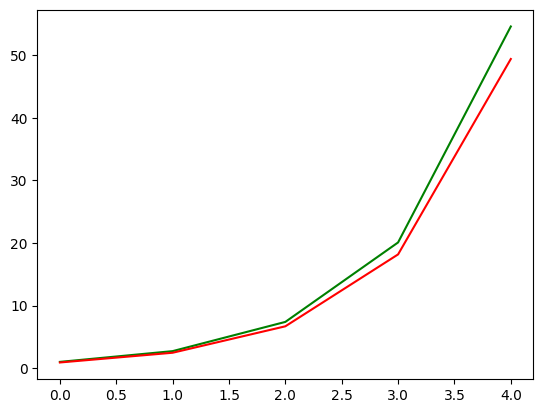

In [56]:
x = np.arange(5)
y = np.exp(x)
z = np.exp(x - 0.1)
plt.plot(x,y,c='green')
plt.plot(x,z,c='red')
plt.show()

<Axes: >

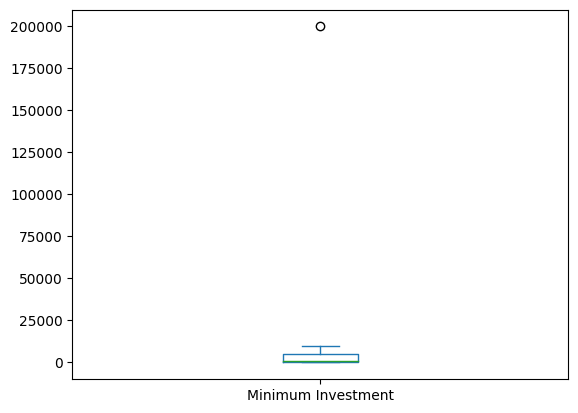

In [57]:
mf['Minimum Investment'].plot.box()
#plt.show()

In [58]:
mf[mf['Minimum Investment']>25000]

,AMC Name,AMC Launch Date,Mutual Fund Name,AUM,Type,Scheme Launch Date,Expense Ratio,Investment Type,NAV,Minimum Investment,...,Total Return,1m_return,1y_return,2y_return,3y_return,4y_return,5y_return,10y_return,Exit Load Per,Exit Load Days
861,Sundaram,1996-02-26,Principal Dynamic Bond Fund Direct Growth,28.0299,Debt,2013-01-01,1.131007,Dynamic Bond,33.645,200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,365


<Axes: >

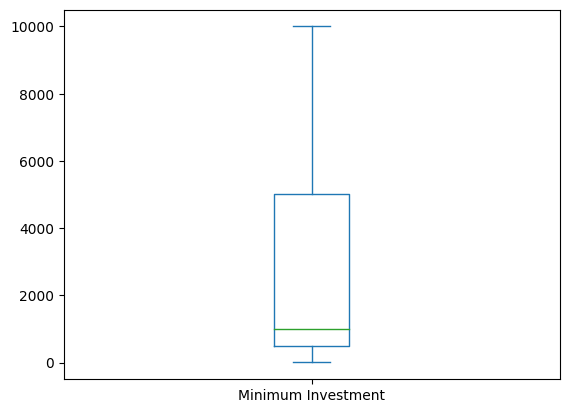

In [59]:
mf[mf['Minimum Investment']<25000]['Minimum Investment'].plot.box()

<Axes: >

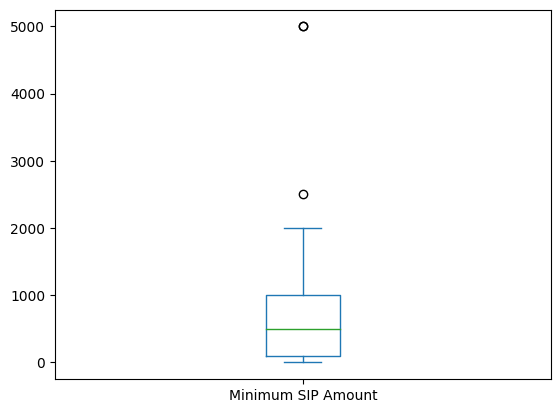

In [60]:
mf['Minimum SIP Amount'].plot.box()